In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import sys,cv2,copy
sys.path.append('/opt/goat_41') # change this to the path of the 'goat_41'
from matplotlib import pyplot as plt

import numpy as np
from src.componenets.nih import NIH
root = '/data1/pxi-dataset/cxr/public/nih/image_v1_1024' # change this to the path of the NIH dataset
nihset = NIH(root, 'test', image_size=512)

In [2]:
from infer_pleural_effusion import PleuralEffusion
model = PleuralEffusion()

In [3]:
dummy = nihset[1895]
print(dummy['label_name'])
output = model.run(dummy['path'])

effusion
0.9988954
1.0


0.6057808995246887


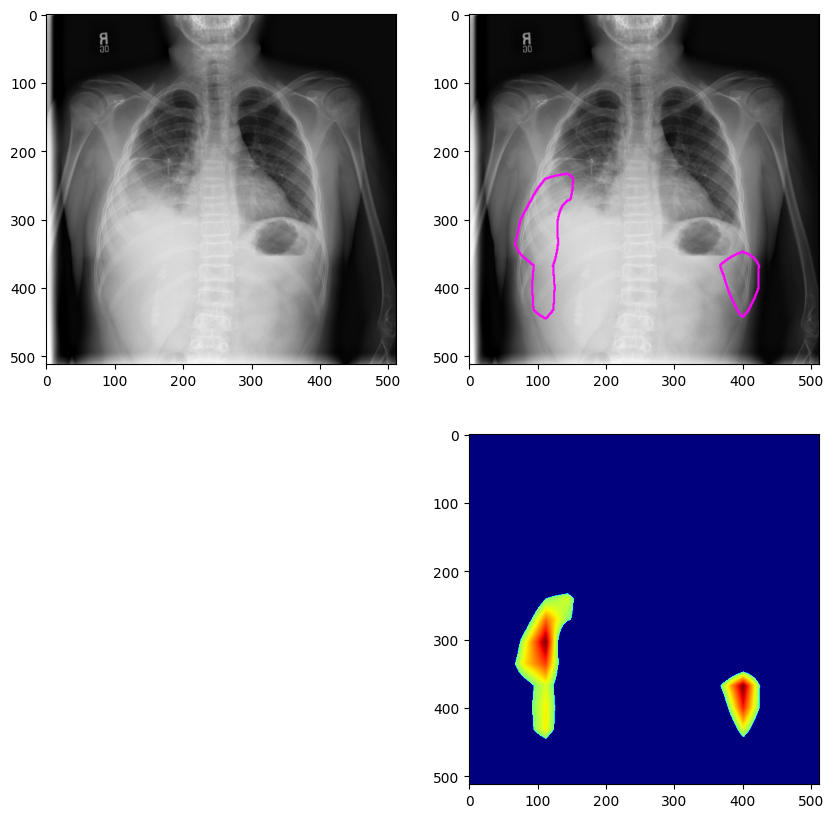

In [4]:
print(output['probabilty'])

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output['image'])
plt.subplot(2,2,2)
plt.imshow(output['overlay_image'], cmap='jet')
plt.subplot(2,2,4)
plt.imshow(output['processed_activation_map'], cmap='jet')

In [47]:
import copy
tmp_act = copy.deepcopy(dummy[2])

tmp_act2 = np.where(tmp_act>0.5, tmp_act, 0)

In [48]:
tmp_act = np.where(tmp_act>0.5, 1, 0).astype(np.uint8)
contours, _ = cv2.findContours(tmp_act, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = []
for contour in contours:
    # 컨투어 내부의 최대 값 찾기
    max_value = np.max(tmp_act * (cv2.drawContours(np.zeros_like(tmp_act), [contour], 0, 1, thickness=cv2.FILLED)))
    
    # 최대 값이 0.9 이상인 경우만 남기기
    if max_value >= 0.9:
        filtered_contours.append(contour)

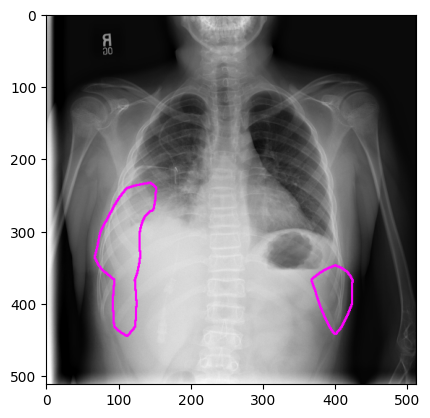

In [53]:
# 원본 이미지에 컨투어 경계 그리기

origin = dummy[0]
# origin = cv2.cvtColor(origin, cv2.COLOR_GRAY2RGB)
cv2.drawContours(origin, filtered_contours, -1, (255, 0, 255), 2)
plt.imshow(origin)
